#### Dhany Septiandhika Pratama / A11.2019.11750

# 1. Implementasi Decision Tree Classifier dengan python

### Import library numpy, matplotlib dan pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import Dataset

In [2]:
dataset = pd.read_csv('SocialNetwork.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### Splitting the dataset into the training set and test set

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Training the Decision Tree Classification model on the Training set

In [5]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting the Test set results

In [6]:
y_pred = classifier.predict(x_test)

In [7]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [8]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.91

### Making the Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[62  6]
 [ 3 29]]


### Visualizing the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


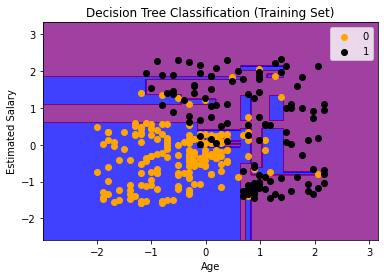

In [11]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01), np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('blue', 'purple')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('orange', 'black'))(i), label = j)
plt.title('Decision Tree Classification (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualizing the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


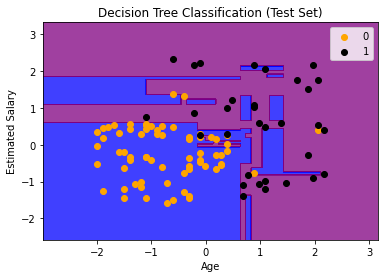

In [12]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01), np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('blue', 'purple')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('orange', 'black'))(i), label = j)
plt.title('Decision Tree Classification (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()

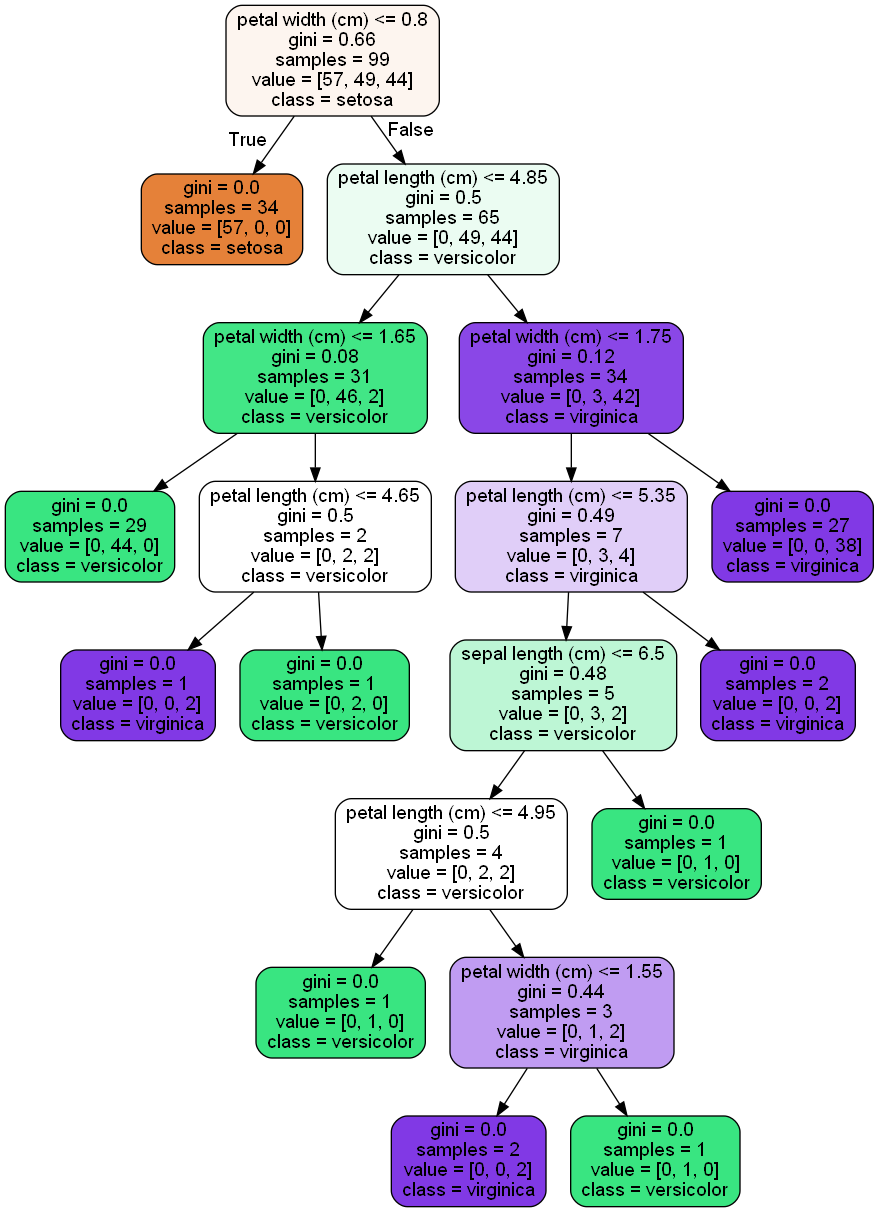

In [14]:
# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import check_call
check_call(['dot', '-Tpng', 'tree.dot', '-o', 'tree_A11.2019.11750.png'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_A11.2019.11750.png')

## ====================>          END          <====================

# 2. Implementasi python algoritma C4.5 Decision Tree

### Import library yang diperlukan yaitu scikit learn untuk decision tree, dataset dan matplotlib

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import matplotlib.pyplot as plt

### Load Dataset Iris dari library scikit learn

In [16]:
iris = datasets.load_iris()
features = iris['data']
target = iris['target']

### Membuat Objek Model Decision Tree

In [17]:
decisiontree = DecisionTreeClassifier(random_state = 0, max_depth = None,
                                     min_samples_split = 2, min_samples_leaf = 1,
                                     min_weight_fraction_leaf = 0,
                                     max_leaf_nodes = None,
                                     min_impurity_decrease = 0)

### Mentraining Model Decision Tree

In [18]:
model = decisiontree.fit(features, target)

### Mengambil sampel observasi dan membuat prediksi. Sampel berupa data dimensi kelompok. Fungsi predict() => memeriksa kelas yang dimilikinya, fungsi predict_proba() => memeriksa probabilitas kelas dari prediksi tersebut

In [19]:
observation = [[5, 4, 3, 2]]
model.predict(observation)
model.predict_proba(observation)

array([[0., 1., 0.]])

### Membuat grafik visualisasi Decision Tree

In [20]:
import pydotplus
from sklearn import tree
dot_data = tree.export_graphviz(decisiontree, out_file = None,
                               feature_names = iris['feature_names'], class_names = iris['target_names'])
from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_png('iris_A11.2019.11750.png')

True

## ====================>          END          <====================

# 3. Implementasi Python dengan Dataset CSV

### Import library pandas numpy dan scikit learn

In [21]:
import numpy as np
import pandas as pd
from sklearn import tree

### Membaca dataset dari file ke pandas dataFrame

In [22]:
irisDataset = pd.read_csv('DatasetIris.csv', delimiter =';', header = 0)

### Mengubah kelas (kolom spesies) dari string ke uniq-integer

In [23]:
irisDataset["Species"] = pd.factorize(irisDataset.Species)[0]

### Menghapus kolom 'Id'

In [24]:
irisDataset = irisDataset.drop(labels = "Id", axis = 1)

### Mengubah dataframe ke array numpy

In [25]:
irisDataset = irisDataset.to_numpy()

### Membagi dataset, 40 baris data untuk ditraining dan 20 baris untuk testing

In [26]:
dataTraining = np.concatenate((irisDataset[0:40,:], irisDataset[50:90,:]), axis = 0)
dataTesting = np.concatenate((irisDataset[40:50,:], irisDataset[90:100,:]), axis = 0)

### Memecah dataset ke input dan label

In [27]:
inputTraining = dataTraining[:,0:4]
inputTesting = dataTesting[:,0:4]
labelTraining = dataTraining[:,4]
labelTesting = dataTesting[:,4]

### Mendefinisikan decision tree classifier

In [28]:
model = tree.DecisionTreeClassifier()

### Mentraining model

In [29]:
model = model.fit(inputTraining, labelTraining)

### Memprediksi input data testing

In [30]:
hasilPrediksi = model.predict(inputTesting)
print("label sebenarnya ", labelTesting)
print("Hasil prediksi:", hasilPrediksi)

label sebenarnya  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Hasil prediksi: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Menghitung akurasi

In [31]:
prediksiBenar = (hasilPrediksi == labelTesting).sum()
prediksiSalah = (hasilPrediksi != labelTesting).sum()
print("Prediksi benar: ", prediksiBenar, "data")
print("Prediksi salah: ", prediksiSalah, "data")
print("Akurasi: ", prediksiBenar/(prediksiBenar + prediksiSalah)* 100,"%")

Prediksi benar:  20 data
Prediksi salah:  0 data
Akurasi:  100.0 %


## ====================>          END          <====================